# Suggestions for Searching for the Origin of Replication of CMV

The Human Cytomegalovirus (CMV) is a potentially life threatening disease. Those with suppressed or a
deficient immune system are at most risk of fatality with CMV. Infection rates vay by geography, typically
ranging around 30%-80% of the population. Children under the age of 5 are particularly susceptible, with
infection rates around 10%-15%. CMV is difficult to detect because the virus remains dormant until a critical
mass is achieved through reproduction. In order to combat the virus, virologists have decided that if the
origin of replication may be isolated, the reproductive cycle of the virus may be interrupted, thereby the
virus will remain perpetually dormant.

### Data
Two viruses, Herpes and Epstein-Barr virus, of the same family have been studied in order to determine
the best method to isolate the origin of replication. Both viruses contain one or more palindromes in its
DNA sequence. Understanding the process by which DNA is replicated, these special sequences may indicate
the origin of replication for these viruses. In particular, complementary palindromes are interesting because
the latter half of the palindrome is exactly written in the complementary base pairs to the first half of the
palindrome. Data published by Chee et. al (1990) on CMV indicates the locations of palindromes in the
CMV DNA sequence. The CMV DNA is 229,354 base pairs long, and a study published by Leung et. al
(1991), which implemented algorithms to search for different patterns, indicate the longest palindromes of
18 base pairs occur at locations 14719, 75812, 90763, 173893. Only palindromes of length 10-18 base pairs
were counted, totaling 296.

### Objective
We are seeking to confirm that certain clusters of palindromes are statistically different from the other
clusters. In other words, certain clusters of palindromes that do not occur by random chance given the
distribution of the clusters may signify the location of the origin of replication. The researchers working on
the CMV should begin their search within these clusters. Doing this analysis will save researchers time and
money in the search for the origin of replication.

[1] "Midpoints of intervals with maximum number of palindromes clustered are:"
[1] "94001 : 14 palindromes"
[1] "194001 : 11 palindromes"
[1] "62001 : 9 palindromes"  "74001 : 9 palindromes"  "138001 : 9 palindromes"
[4] "142001 : 9 palindromes"
[1] "18001 : 8 palindromes"    "54001 : 8 palindromes"   
[3] "190001 : 8 palindromes"   "222001 : 8 palindromes"  
[5] "226677.5 : 8 palindromes"
[1] "2001 : 7 palindromes"   "86001 : 7 palindromes"  "90001 : 7 palindromes" 
[4] "162001 : 7 palindromes" "170001 : 7 palindromes"


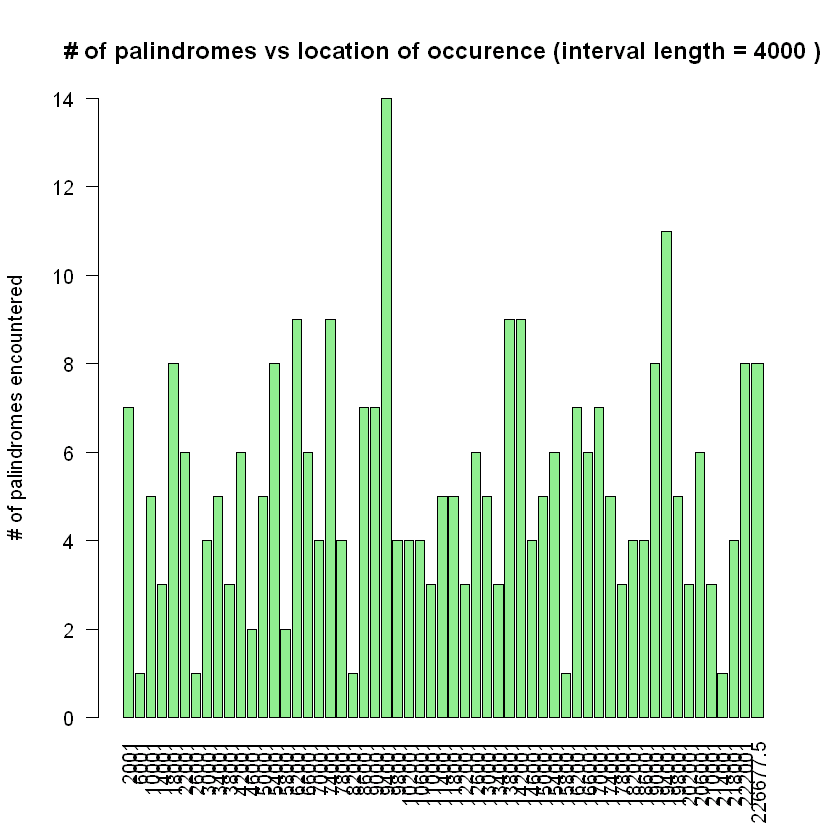

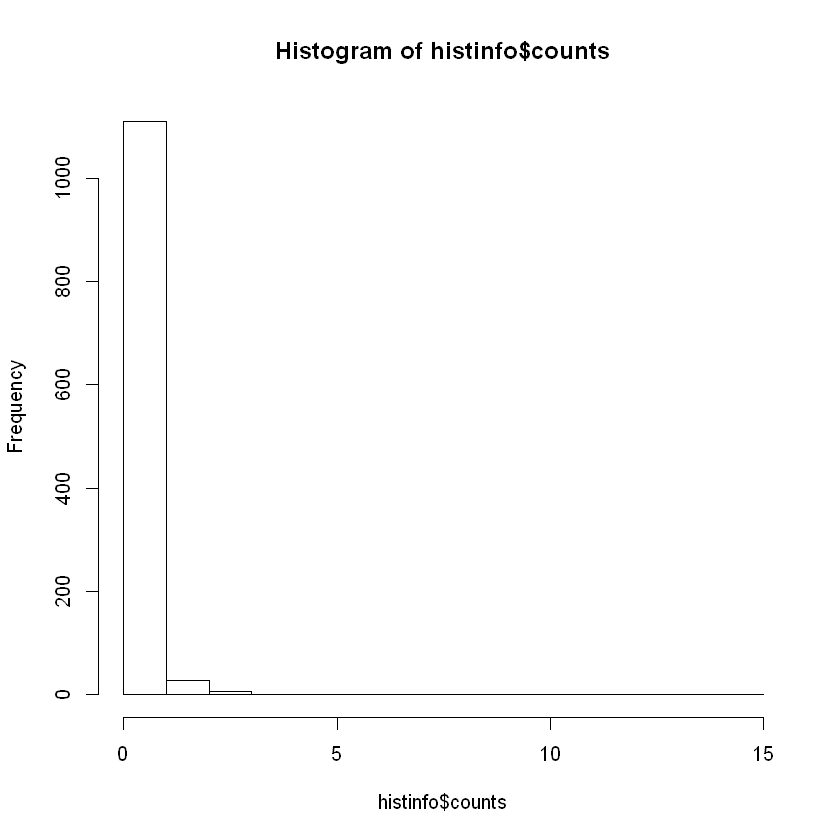

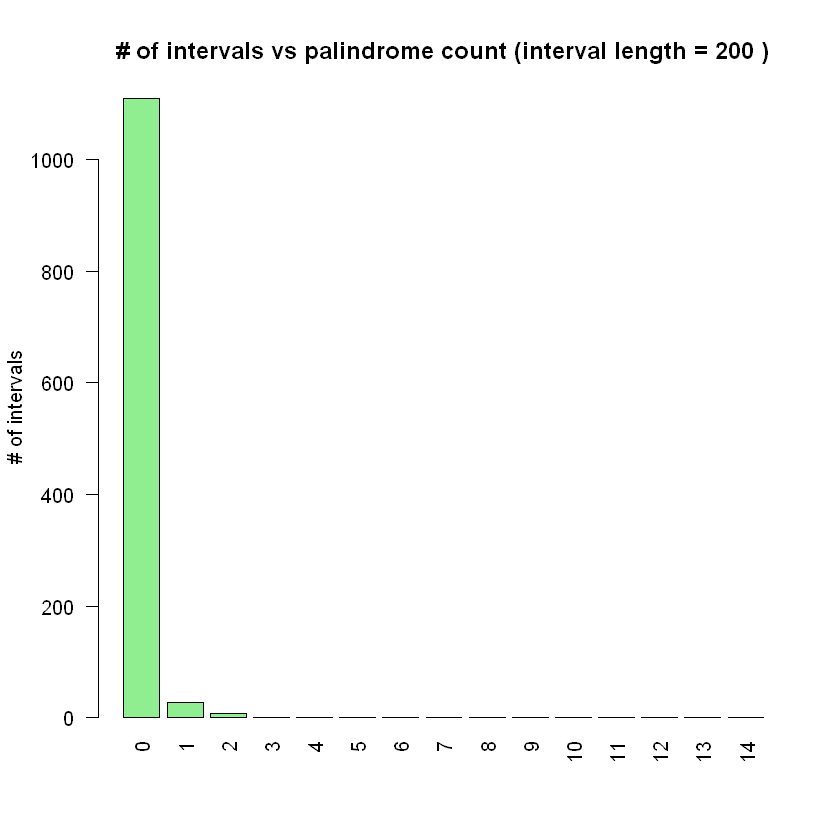

[1] "Midpoints of intervals with maximum number of palindromes clustered are:"
[1] "174001 : 6.46666666666667 palindromes"  
[2] "226677.5 : 6.46666666666667 palindromes"
[1] "162001 : 6.13333333333333 palindromes"
[2] "194001 : 6.13333333333333 palindromes"
[1] "86001 : 6.06666666666667 palindromes"
[1] "74001 : 6 palindromes"
[1] "142001 : 5.93333333333333 palindromes"
[1] "154001 : 5.86666666666667 palindromes"
[1] "42001 : 5.8 palindromes"  "82001 : 5.8 palindromes" 
[3] "118001 : 5.8 palindromes" "170001 : 5.8 palindromes"
[1] "78001 : 5.73333333333333 palindromes"
[1] "90001 : 5.66666666666667 palindromes" 
[2] "126001 : 5.66666666666667 palindromes"
[1] "10001 : 5.6 palindromes"  "182001 : 5.6 palindromes"
[1] "138001 : 5.53333333333333 palindromes"
[2] "150001 : 5.53333333333333 palindromes"
[1] "106001 : 5.46666666666667 palindromes"
[1] "158001 : 5.4 palindromes" "186001 : 5.4 palindromes"
[1] "34001 : 5.33333333333333 palindromes" 
[2] "122001 : 5.33333333333333 palindromes"

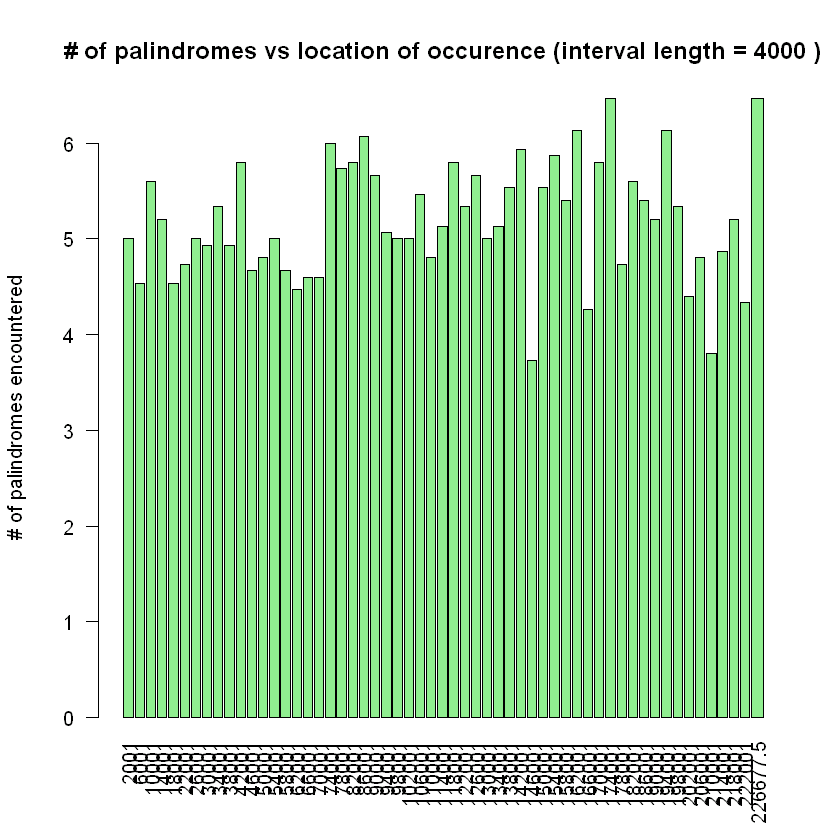

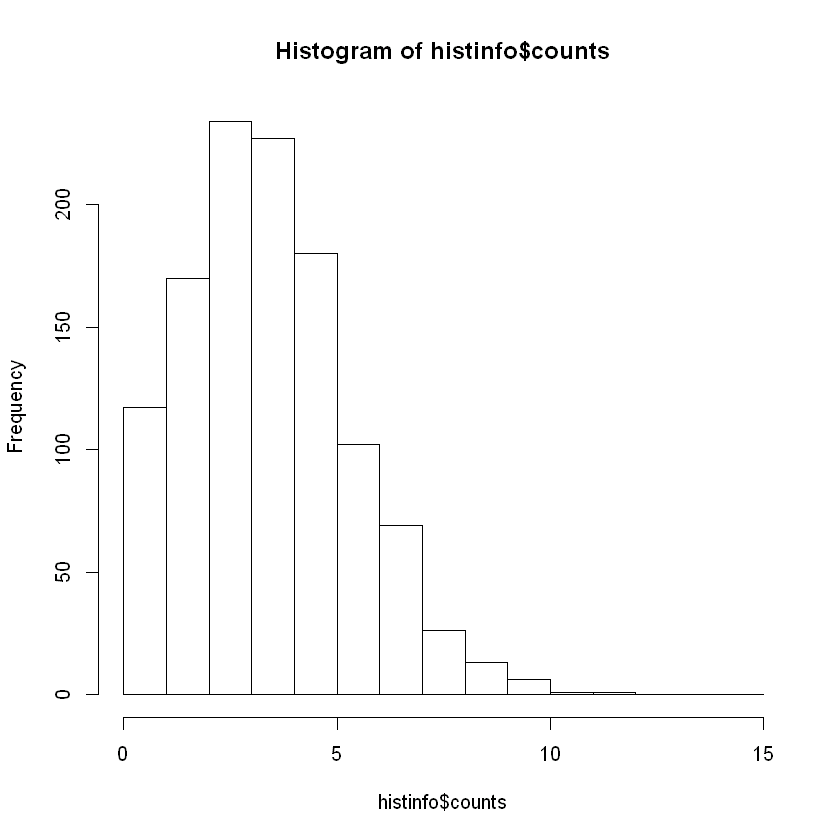

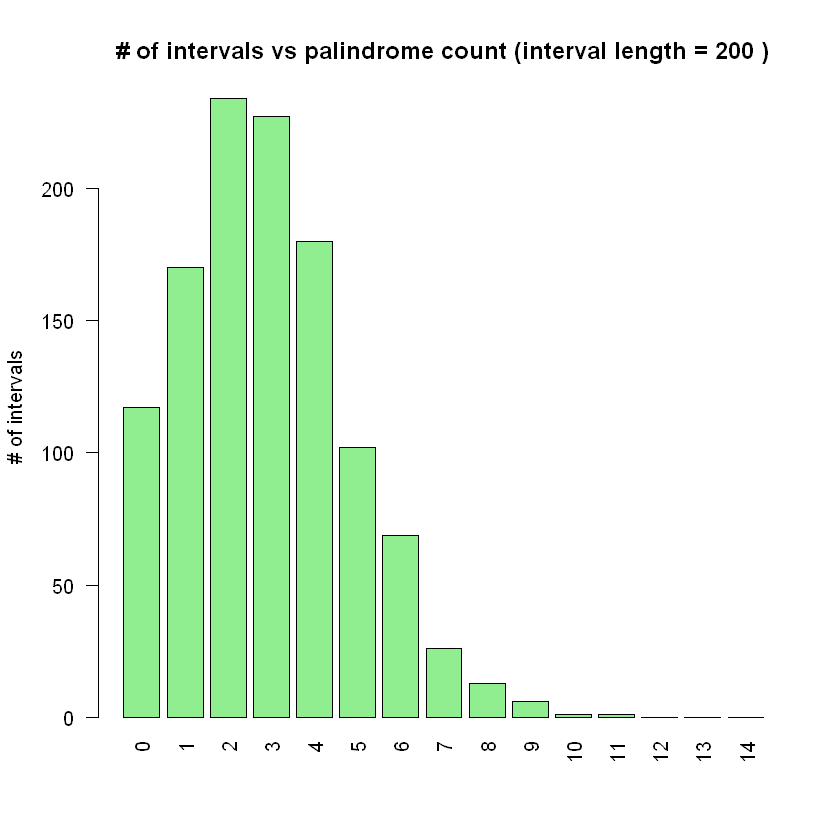

In [8]:
rm(list=ls())
# Function definitions

lm_eqn <- function(df){
  m <- lm(y ~ x, df);
  eq <- substitute(italic(y) == a + b %.% italic(x)*","~~italic(r)^2~"="~r2, 
                   list(a = format(coef(m)[1], digits = 2), 
                        b = format(coef(m)[2], digits = 2), 
                        r2 = format(summary(m)$r.squared, digits = 3)))
  as.character(as.expression(eq));                 
}
# Reading in data from file into dataframe
dat <- read.table("hcmv.txt",header = T)

#################################### PART A1 #################################

# binning the data into histograms to look at # of palindromes for various interval lengths
explore <- function(x,interval,threshold,print=T,samples=1,par=1){
  bins <- c(((0: (floor(229354/interval)-1))*interval)+1,229354)
  histinfo <- hist(x,breaks=bins,plot=F)
  if(par==2){
    info <- hist(histinfo$counts,breaks=c(0:15))
    barplot(height = (info$counts)/samples,width = 1,names.arg = c(0:14),col = "lightgreen",las=2,ylim=c(0, max(info$counts/samples)),ylab = "# of intervals",main = paste("# of intervals vs palindrome count (interval length =", interval,")"))
    return (info)
  }
  if(par==1){
    counts_d <- sort(histinfo$counts,decreasing = T)
    counts_i <- unique(counts_d[which(counts_d>threshold)])
    barplot(height = (histinfo$counts)/samples,width = diff(bins),names.arg = histinfo$mids,col = "lightgreen",las=2,ylim=c(0, max(histinfo$counts/samples)),ylab = "# of palindromes encountered",main = paste("# of palindromes vs location of occurence (interval length =", interval,")"))
    if(print){
      print("Midpoints of intervals with maximum number of palindromes clustered are:")
      for (j in counts_i/samples){
        print(paste(histinfo$mids[(which(histinfo$counts/samples==j))],":",j,"palindromes"))
      }
    }
    l <- list("hi"=histinfo, "ci"= counts_i/samples, "c"=histinfo$counts/samples)
    return(l)
  }
}

interval1 = 4000
threshold1 = 6
bins <- c(((0: (floor(229354/interval1)-1))*interval1)+1,229354)
ret1 <- explore(dat$location,interval1,threshold1,print=T)
#Intervals with 0-14 palindromes
ret2 <- explore(dat$location,200,par=2)

####################################      PART A2      #################################
# generating a simulated sample of 296 palindrom locations from 229354 possible sites
dat_simulated1 <- sample(1:229354,296*15,replace = T)
ret21<- explore(dat_simulated1,interval1,threshold1,print=T,samples = 15)
#Intervals with 0-14 palindromes
ret22<- explore(dat_simulated1,200,par=2)

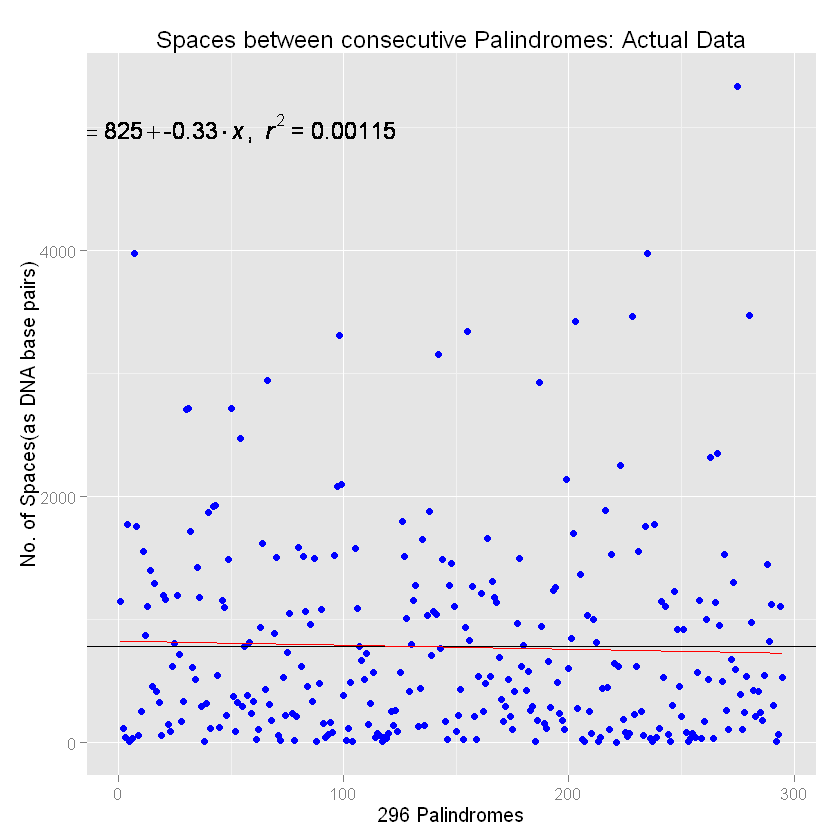

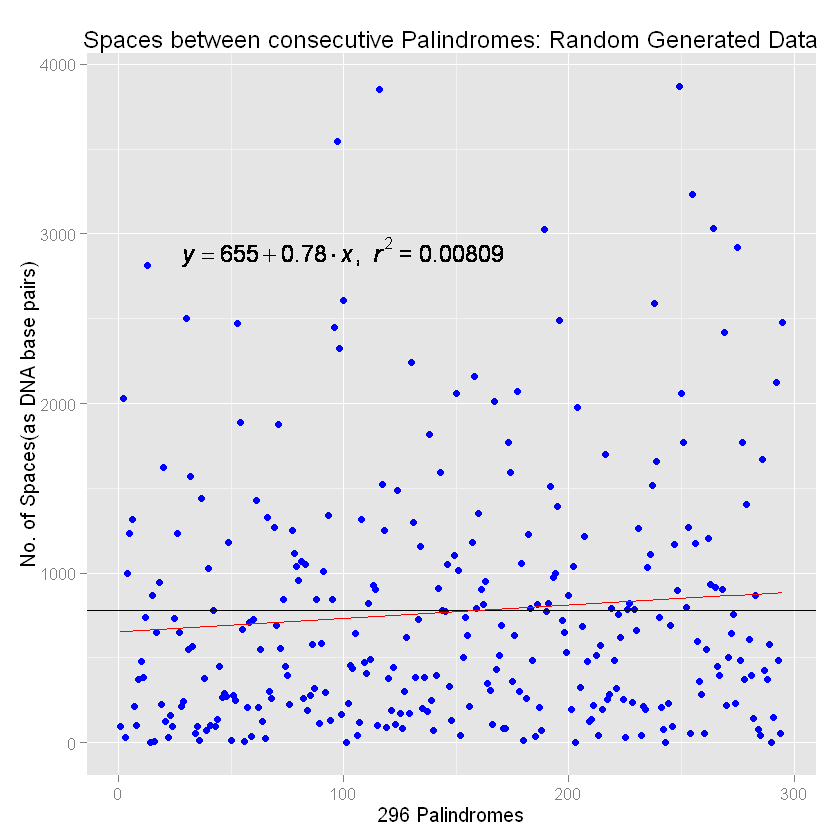

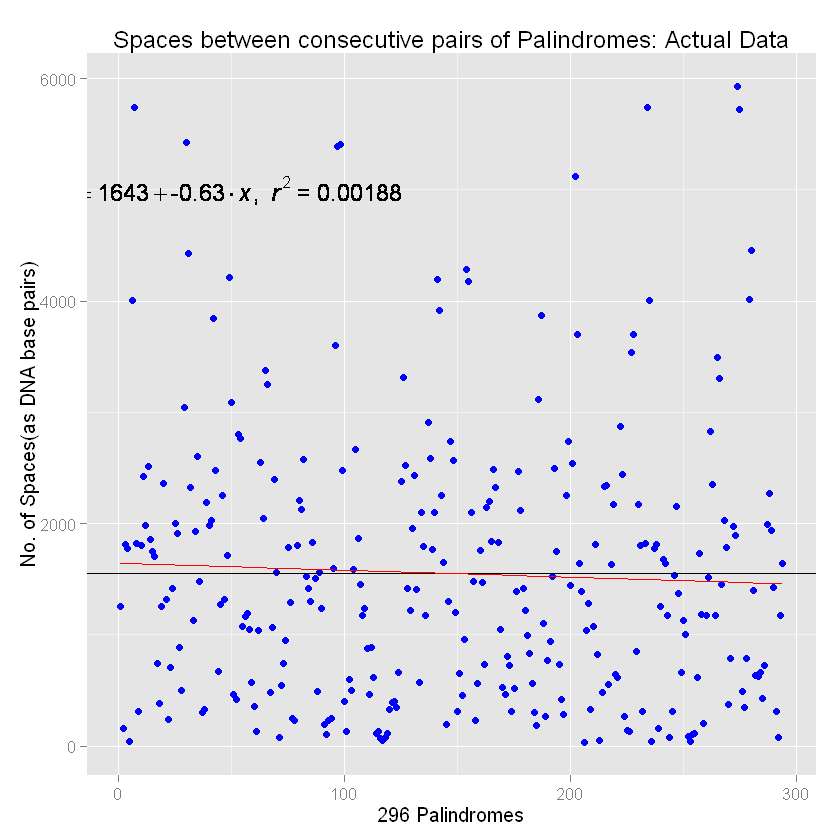

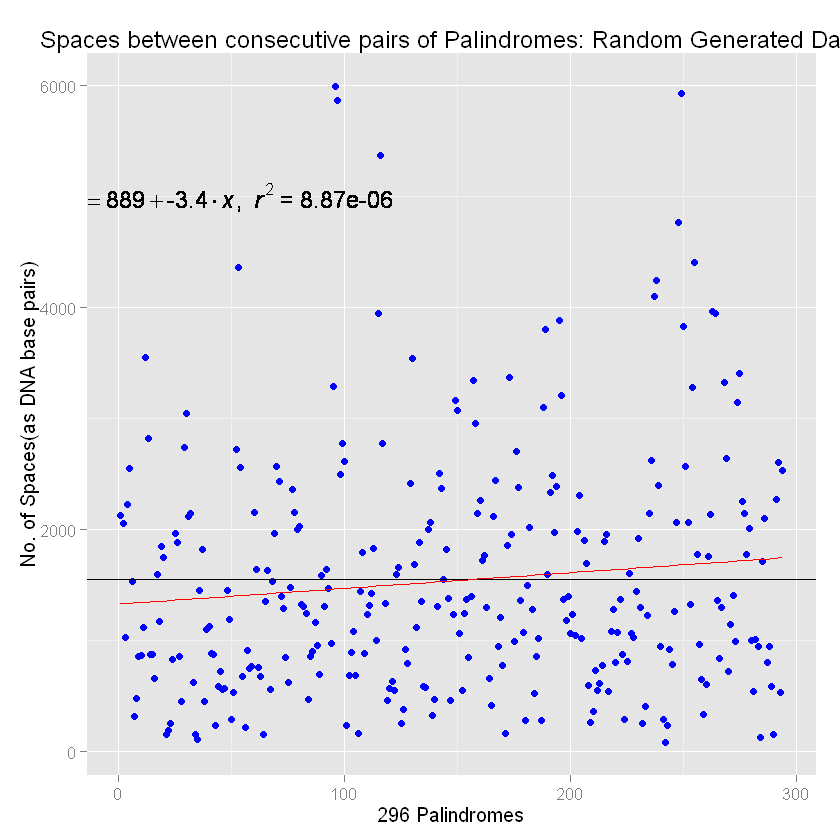

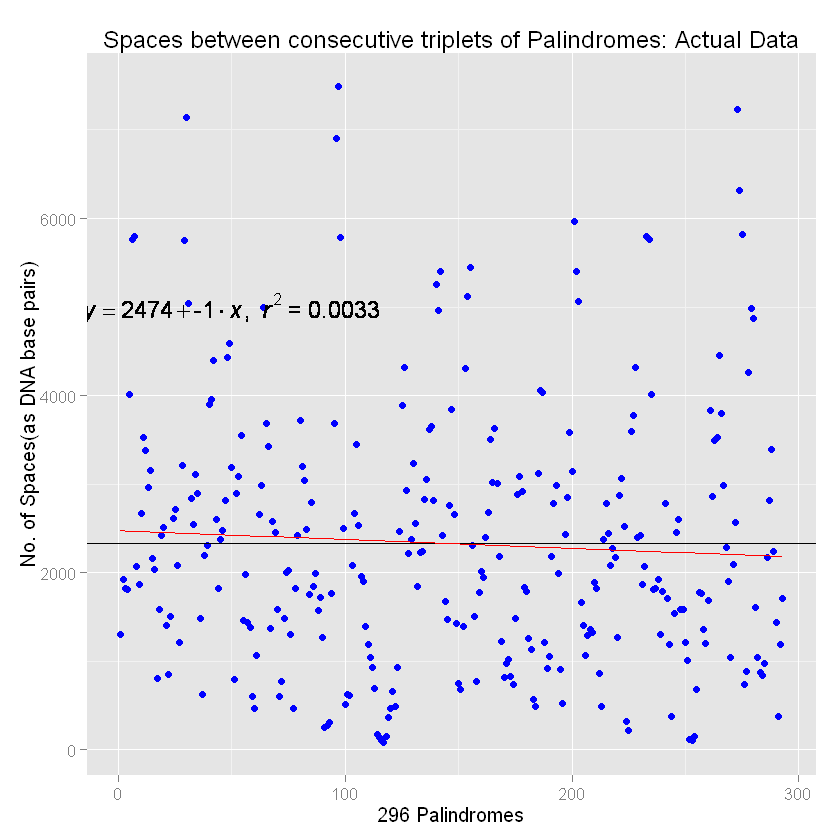

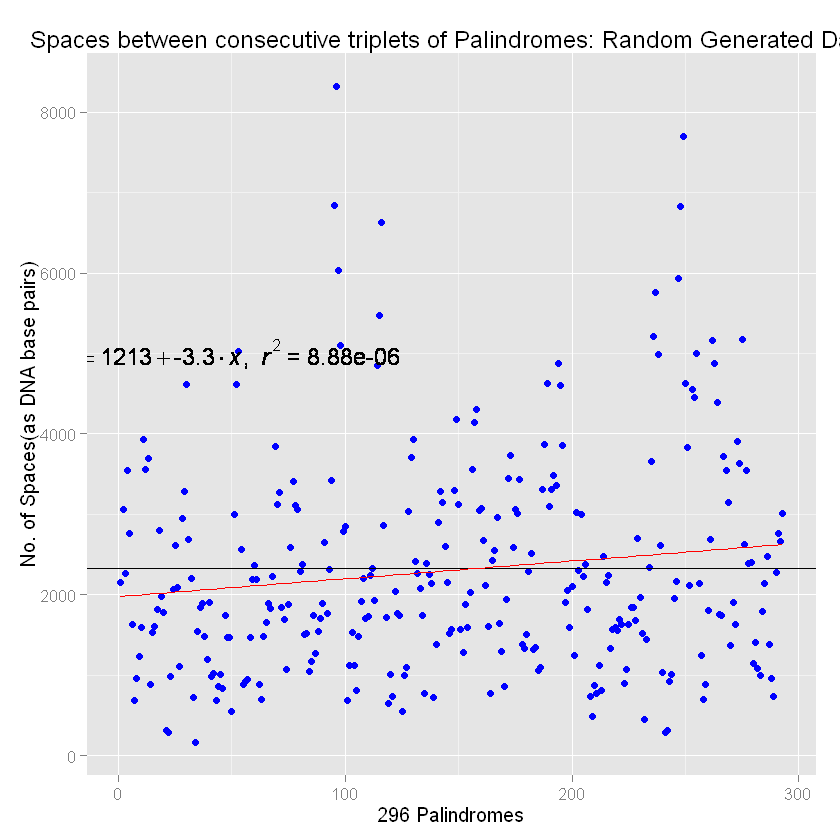

In [4]:
dat_simulated2 <- sample(1:229354,296,replace=F)
df_actual <- data.frame(x=1:295,y=diff(dat$location))
df_random <- data.frame(x=1:295,y=diff(sort(dat_simulated2,decreasing = F)))
df1_actual <- data.frame(x=1:294,y=diff(dat$location,lag=2))
df2_actual <- data.frame(x=1:293,y=diff(dat$location,lag=3))
df1_random <- data.frame(x=1:294,y=diff(dat_simulated2,lag=2))
df2_random <- data.frame(x=1:293,y=diff(dat_simulated2,lag=3))

library(ggplot2)
ggplot(df_actual,aes(x=1:295,y=diff(dat$location)))+geom_point(col="blue")+geom_hline(yintercept = 229354/295)+labs(x="296 Palindromes",y="No. of Spaces(as DNA base pairs)",title="Spaces between consecutive Palindromes: Actual Data")+geom_text(x =50, y = 5000, label = lm_eqn(df_actual), parse = TRUE)+geom_smooth(method='lm',se=F,col='red')
ggplot(df_random,aes(x=1:295,y=diff(sort(dat_simulated2,decreasing = F))))+geom_point(col="blue")+geom_hline(yintercept = 229354/295)+labs(x="296 Palindromes",y="No. of Spaces(as DNA base pairs)",title="Spaces between consecutive Palindromes: Random Generated Data")+geom_text(x =100, y = 2900, label = lm_eqn(df_random), parse = TRUE)+geom_smooth(method='lm',se=F,col='red')
ggplot(df1_actual,aes(x=1:294,y=diff(dat$location,lag=2)))+geom_point(col="blue")+geom_hline(yintercept = 2*229354/295)+labs(x="296 Palindromes",y="No. of Spaces(as DNA base pairs)",title="Spaces between consecutive pairs of Palindromes: Actual Data")+geom_text(x =50, y = 5000, label = lm_eqn(df1_actual), parse = TRUE)+geom_smooth(method='lm',se=F,col='red')
ggplot(df1_random,aes(x=1:294,y=diff(sort(dat_simulated2,decreasing = F),lag=2)))+geom_point(col="blue")+geom_hline(yintercept = 2*229354/295)+labs(x="296 Palindromes",y="No. of Spaces(as DNA base pairs)",title="Spaces between consecutive pairs of Palindromes: Random Generated Data")+geom_text(x =50, y = 5000, label = lm_eqn(df1_random), parse = TRUE)+geom_smooth(method='lm',se=F,col='red')
ggplot(df2_actual,aes(x=1:293,y=diff(dat$location,lag=3)))+geom_point(col="blue")+geom_hline(yintercept = 3*229354/295)+labs(x="296 Palindromes",y="No. of Spaces(as DNA base pairs)",title="Spaces between consecutive triplets of Palindromes: Actual Data")+geom_text(x =50, y = 5000, label = lm_eqn(df2_actual), parse = TRUE)+geom_smooth(method='lm',se=F,col='red')
ggplot(df2_random,aes(x=1:293,y=diff(sort(dat_simulated2,decreasing = F),lag=3)))+geom_point(col="blue")+geom_hline(yintercept = 3*229354/295)+labs(x="296 Palindromes",y="No. of Spaces(as DNA base pairs)",title="Spaces between consecutive triplets of Palindromes: Random Generated Data")+geom_text(x =50, y = 5000, label = lm_eqn(df2_random), parse = TRUE)+geom_smooth(method='lm',se=F,col='red')


Warning message:
In plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, : the AREAS in the plot are wrong -- rather use 'freq = FALSE'

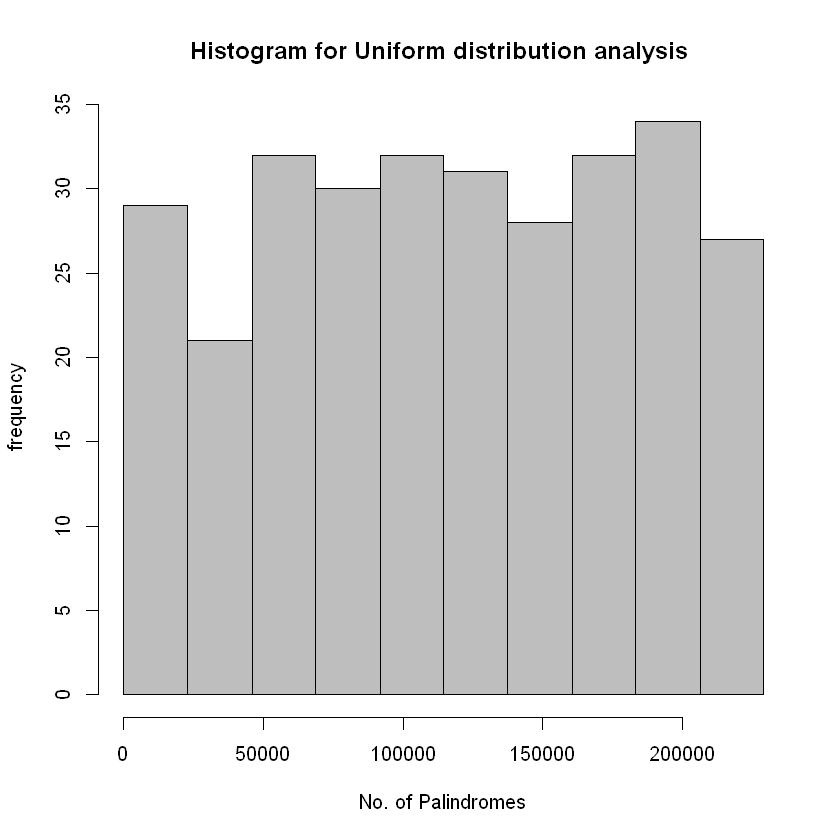

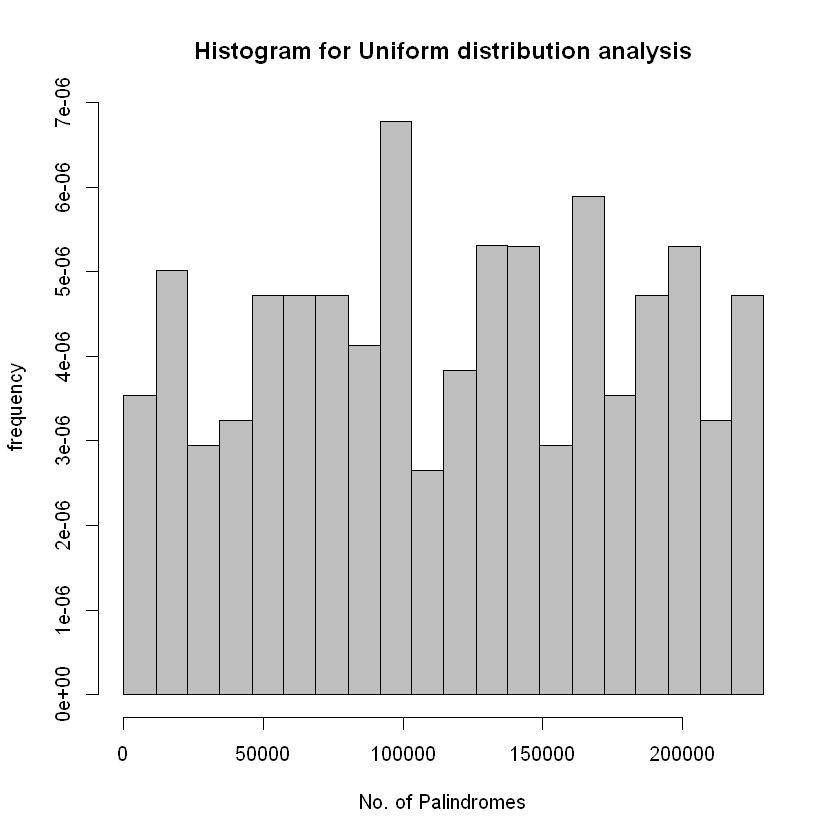

[1] "Uniform Distribution for 10 intervals Goodness-of-Fit test:"
[1] "The value of chi-squared statistic is 4.13513513513514"
[1] "The p-value is 0.902295090821097"
The standard residuals are as follows: 
 -0.1102822 -1.580711 0.4411288 0.07352146 0.4411288 0.2573251 -0.2940858 0.4411288 0.8087361 -0.4778895

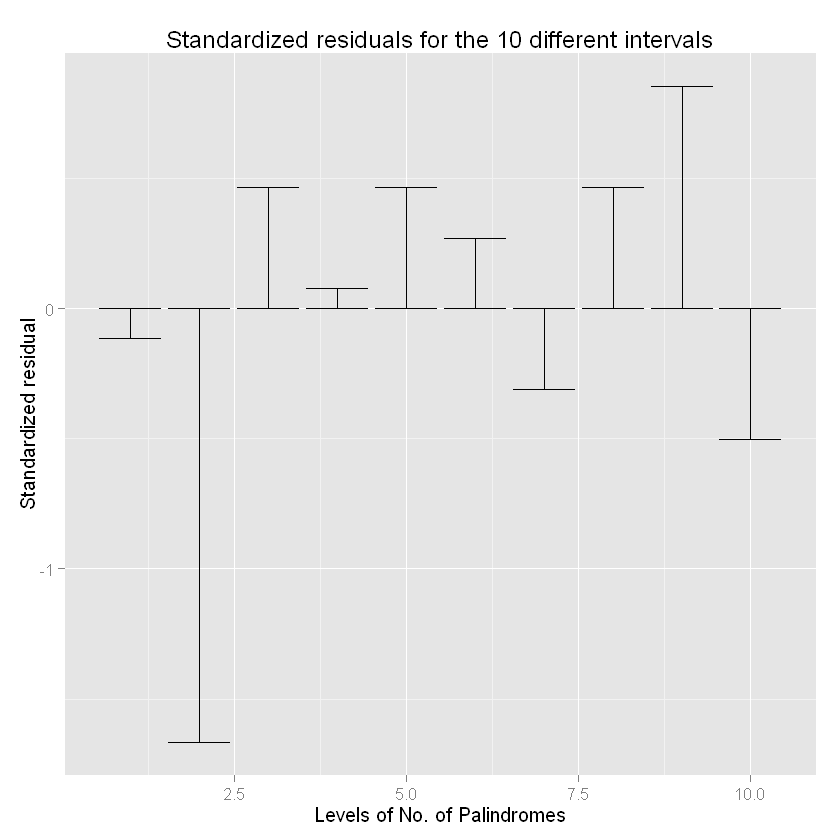

[1] "Uniform Distribution for 20 intervals Goodness-of-Fit test:"
[1] "The value of chi-squared statistic is 17.9189189189189"
[1] "The p-value is 0.527860332119311"
The standard residuals are as follows: 
 -0.7278253 0.5718628 -1.247701 -0.987763 0.3119251 0.3119251 0.3119251 -0.2079501 2.131489 -1.507638 -0.4678877 0.8318004 0.8318004 -1.247701 1.351676 -0.7278253 0.3119251 0.8318004 -0.987763 0.3119251

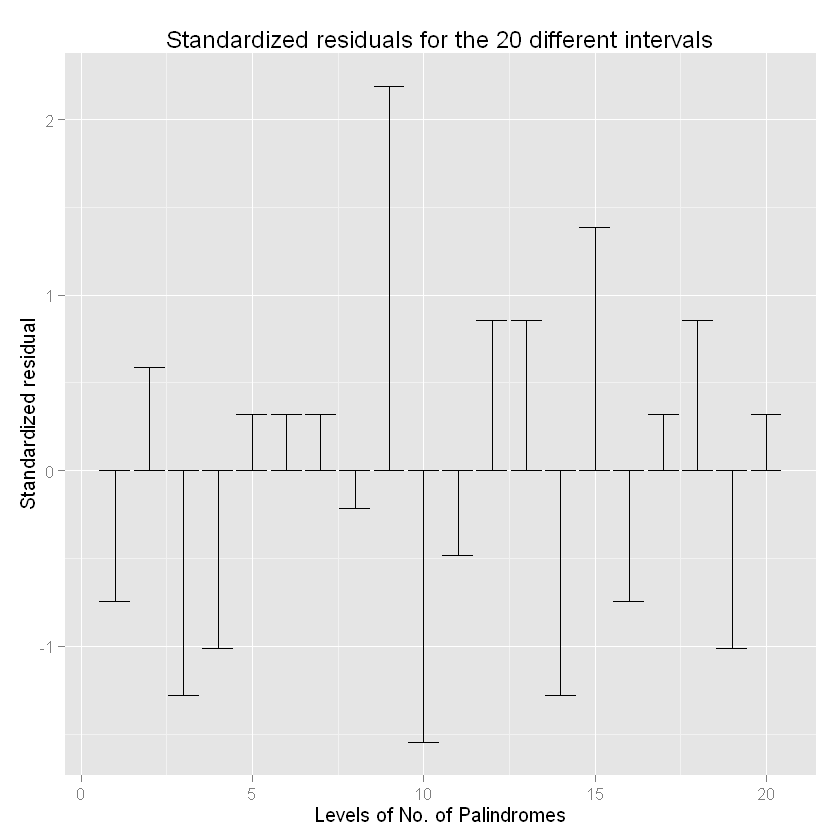

In [5]:
#################################   PART B: Statistical Analysis   ################

# We can see that no matter the length of the intervals, there always seem to be
# one or two outliers of intervals containing a higher number of palindromes.
# We can observe that the intervals of the random hits do not display such
# outliers. Therefore it would seem logical to deduce that the outliers on the DNA
# are atypical and worth examining for the replication code.

########################        PART B1: Uniform Distribution   ####################

uniform_bins <- round(0:10*229354/10)
uniform_bins2 <- round(0:20*229354/20)
hist_uni <- hist(dat$location,breaks=uniform_bins,col="gray", freq = T, xlab="No. of Palindromes",ylab="frequency",main="Histogram for Uniform distribution analysis ")
hist_uni2 <- hist(dat$location,breaks=uniform_bins2,col="gray", freq = F, xlab="No. of Palindromes",ylab="frequency",main="Histogram for Uniform distribution analysis")
p_uni <- rep(1/length(hist_uni$counts),length(hist_uni$counts))
p_uni2 <- rep(1/length(hist_uni2$counts),length(hist_uni2$counts))
chi_uni <- chisq.test(hist_uni$counts,p=p_uni)
chi_uni2 <- chisq.test(hist_uni2$counts,p=p_uni2)
ggplot(data.frame(cbind(hist_uni$stdres,hist_uni$counts)),aes(x=1:length(hist_uni$counts),y=0))+geom_errorbar(aes(ymin = chi_uni$stdres,ymax=0))+labs(x="Levels of No. of Palindromes",y="Standardized residual",title="Standardized residuals for the 10 different intervals")

print("Uniform Distribution for 10 intervals Goodness-of-Fit test:")
print(paste("The value of chi-squared statistic is",chi_uni$statistic))
print(paste("The p-value is",chi_uni$p.value))
cat("The standard residuals are as follows: \n", chi_uni$residuals)

ggplot(data.frame(cbind(hist_uni2$stdres,hist_uni2$counts)),aes(x=1:length(hist_uni2$counts),y=0))+geom_errorbar(aes(ymin = chi_uni2$stdres,ymax=0))+labs(x="Levels of No. of Palindromes",y="Standardized residual",title="Standardized residuals for the 20 different intervals")
print("Uniform Distribution for 20 intervals Goodness-of-Fit test:")
print(paste("The value of chi-squared statistic is",chi_uni2$statistic))
print(paste("The p-value is",chi_uni2$p.value))
cat("The standard residuals are as follows: \n", chi_uni2$residuals)



Warning message:
In plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, : the AREAS in the plot are wrong -- rather use 'freq = FALSE'

[1] "Poisson Goodness-of-Fit test:"
[1] "The value of chi-squared statistic for is 3.21080085539698"
[1] "The p-value is 0.864840749454273"


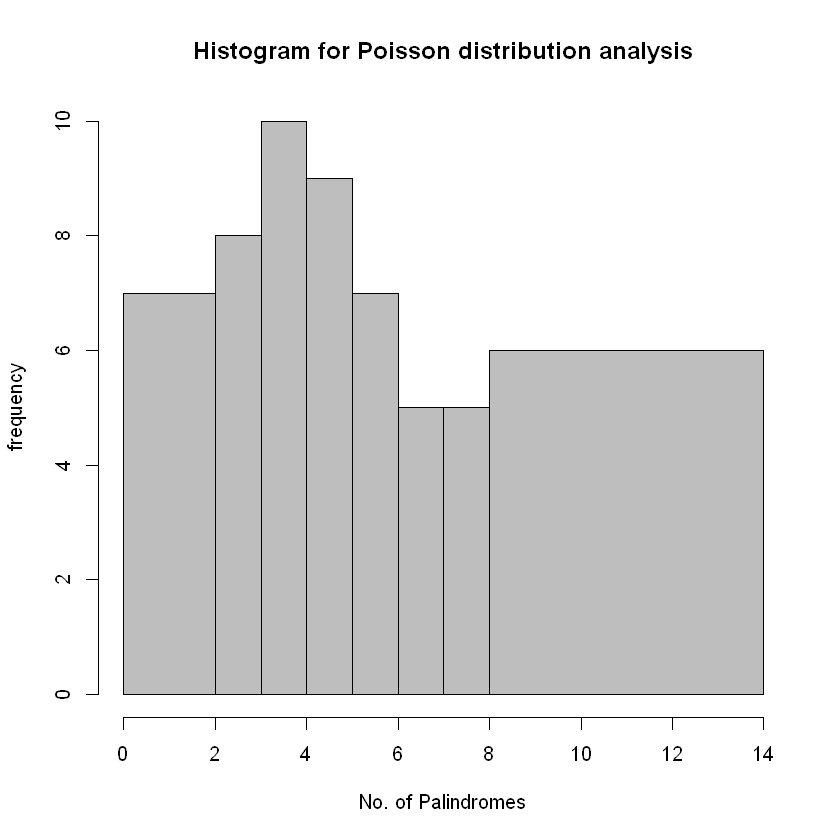

In [11]:
########################  PART B2: Poisson Distribution for Actual data  #################
poisson_bins <- c(0,2,3,4,5,6,7,8,max(ret1$c))
lambda = 296/(length(poisson_bins)-1)
hist_p <- hist(ret1$c,breaks=poisson_bins,col="gray", freq = T, xlab="No. of Palindromes",ylab="frequency",main="Histogram for Poisson distribution analysis")
p_poisson <- diff(ppois(poisson_bins,lambda))
chi_ppoisson <- (p_poisson+((1-sum(p_poisson))/length(p_poisson)))
chi_poisson <- chisq.test(hist_p$counts,p=chi_ppoisson)

print("Poisson Goodness-of-Fit test:")
print(paste("The value of chi-squared statistic for is",chi_poisson$statistic))
print(paste("The p-value is",chi_poisson$p.value))



Warning message:
In plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, : the AREAS in the plot are wrong -- rather use 'freq = FALSE'

[1] "Poisson Goodness-of-Fit test on Simulated Random Data:"
[1] "The value of chi-squared statistic for is 122.791966157592"
[1] "The p-value is 2.00719202190384e-23"


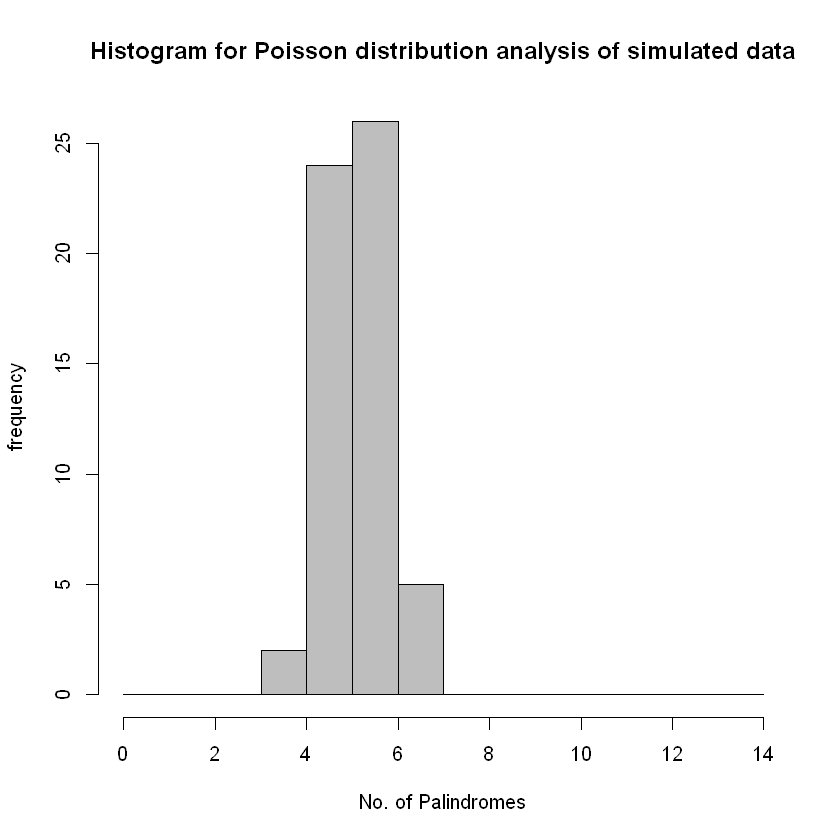

In [12]:
###############   PART B3: Poisson Distribution for Simulated Random data  ##################

hist_pr <- hist(ret21$c,breaks=poisson_bins,col="gray", freq = T, xlab="No. of Palindromes",ylab="frequency",main="Histogram for Poisson distribution analysis of simulated data")
chi_poissonr <- chisq.test(hist_pr$counts,p=chi_ppoisson)
print("Poisson Goodness-of-Fit test on Simulated Random Data:")
print(paste("The value of chi-squared statistic for is",chi_poissonr$statistic))
print(paste("The p-value is",chi_poissonr$p.value))

Warning message:
In plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, : the AREAS in the plot are wrong -- rather use 'freq = FALSE'

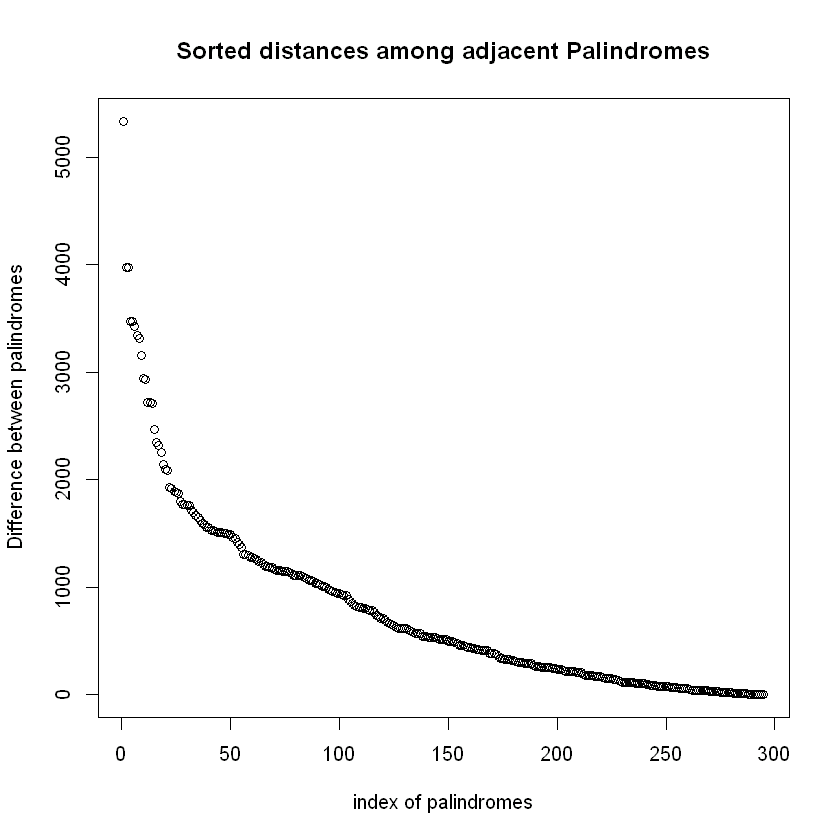

Warning message:
In chisq.test(hist_exp$counts, p = chi_pexp): Chi-squared approximation may be incorrect

[1] "Exponential distribution Goodness-of-Fit test:"
[1] "The value of chi-squared statistic for is 8.15284651531703"
[1] "The p-value is 0.319309313410739"


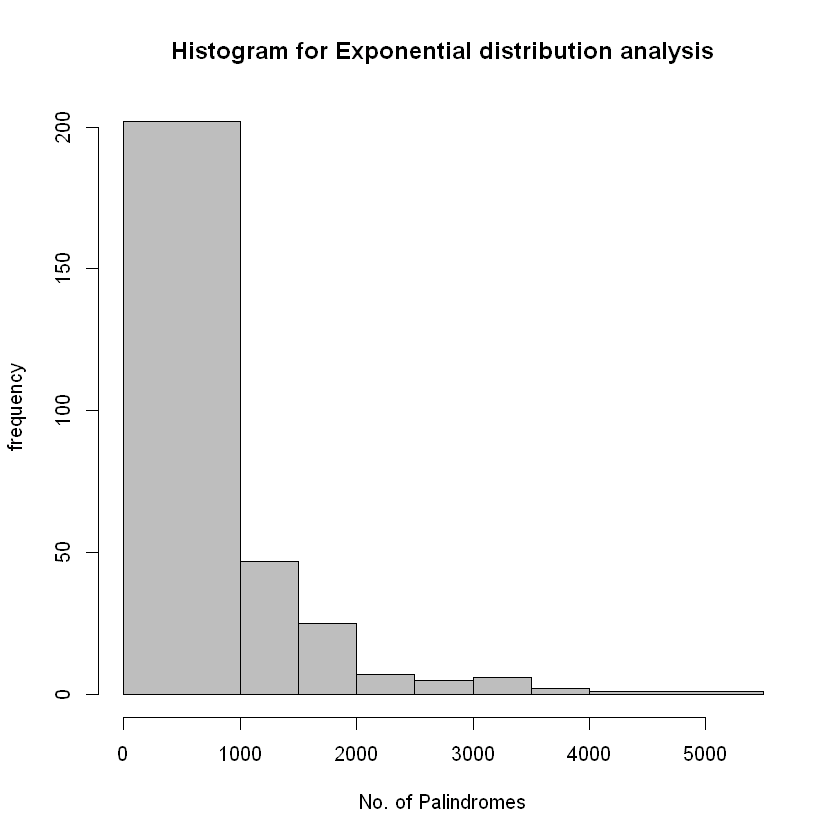

In [13]:
########################        PART B4: Exponential Distribution   #################

plot(sort(diff(dat$location),decreasing = TRUE),xlab = "index of palindromes",ylab = "Difference between palindromes",main ="Sorted distances among adjacent Palindromes")
exp_bins <- c(0,1000,1500,2000,2500,3000,3500,4000,5500)
hist_exp <- hist(diff(dat$location),breaks=exp_bins,col="gray", freq = T, xlab="No. of Palindromes",ylab="frequency",main="Histogram for Exponential distribution analysis")
p_exp <- diff(pexp(exp_bins,rate=295/229354))
chi_pexp <- ((1-sum(p_exp))/length(p_exp))+p_exp
chi_exp <- chisq.test(hist_exp$counts,p=chi_pexp)
print("Exponential distribution Goodness-of-Fit test:")
print(paste("The value of chi-squared statistic for is",chi_exp$statistic))
print(paste("The p-value is",chi_exp$p.value))

Warning message:
In plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, : the AREAS in the plot are wrong -- rather use 'freq = FALSE'Warning message:
In chisq.test(hist_gamma$counts, p = chi_pgamma): Chi-squared approximation may be incorrect

[1] "Gamma distribution Goodness-of-Fit test:"
[1] "The value of chi-squared statistic for is Inf"
[1] "The p-value is 0"


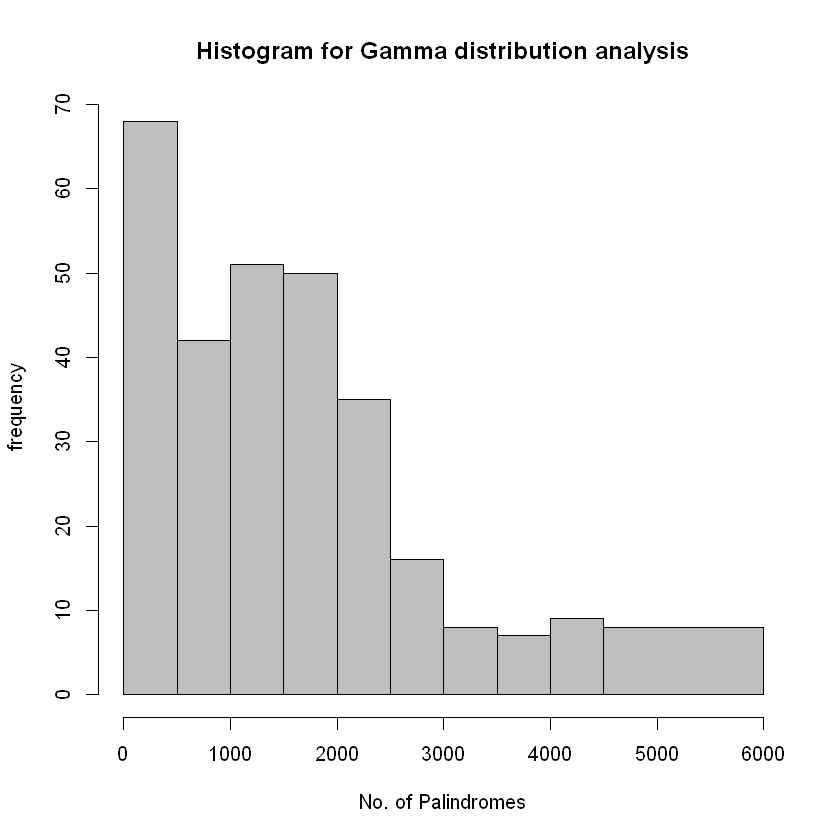

In [14]:
########################        PART B5: Gamma Distribution   #################

gamma_bins <- c(0,500,1000,1500,2000,2500,3000,3500,4000,4500,6000)
hist_gamma <- hist(diff(dat$location,lag=2),breaks=gamma_bins,col="gray", freq = T, xlab="No. of Palindromes",ylab="frequency",main="Histogram for Gamma distribution analysis")
p_gamma <- diff(pgamma(gamma_bins,2,rate=229354/295))
chi_pgamma <- ((1-sum(p_gamma))/length(p_gamma))+p_gamma
chi_gamma <- chisq.test(hist_gamma$counts,p=chi_pgamma)
print("Gamma distribution Goodness-of-Fit test:")
print(paste("The value of chi-squared statistic for is",chi_gamma$statistic))
print(paste("The p-value is",chi_gamma$p.value))


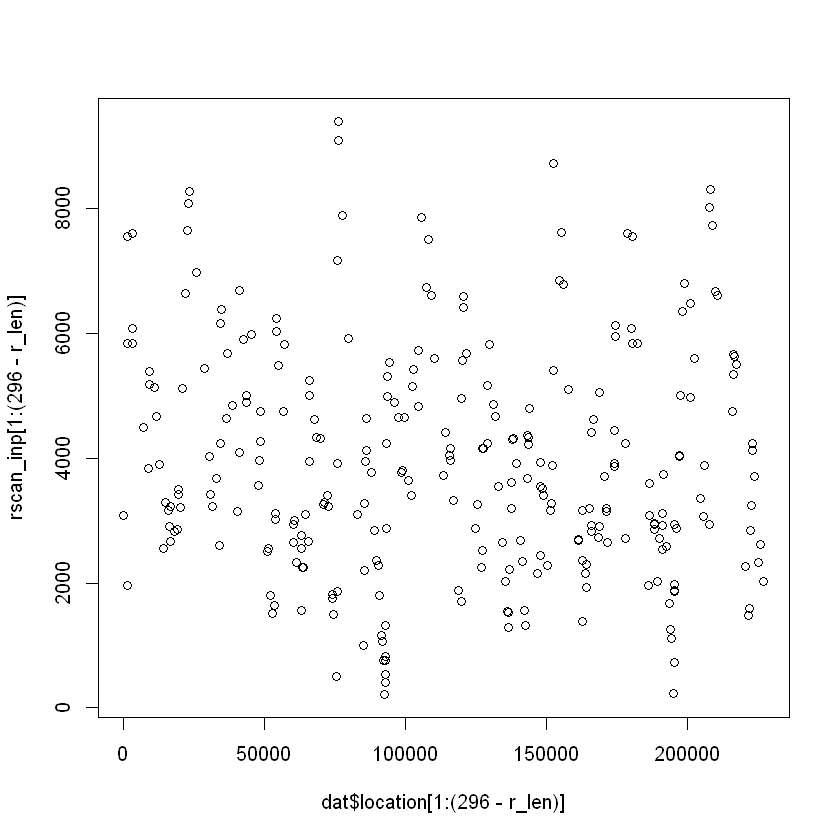

In [15]:
## Advanced Analysis: R-scan statistic
# Scan Statistic: RScan
rscan <- function (x,r){
  
  Ar <- rep(0,296)
  for (i in 1:296){
    count_arr = i:(i+r-1)
    D <- 0;
    for (j in count_arr){
      D = D + (x[j+1] - x[j]);
    }
    Ar[i] = D
  }
  return(Ar)
  
}

r_len = 5
rscan_inp <- rscan(dat$location,r_len)
plot(dat$location[1:(296-r_len)],rscan_inp[1:(296-r_len)])